# Descrição do caso


**Resumo:**  

Paciente do sexo masculino, 33 anos, previamente hígido, procura atendimento devido a fadiga progressiva, palidez, episódios espontâneos de equimoses nos braços (manchas roxas) e gengivorragia há 2 semanas. Ao exame, apresenta-se pálido, com petéquias em membros inferiores (pequenas pontos avermelhados) e discreta hepatoesplenomegalia (aumento do fígado e baço). Também reporta várias infecções ao longo das semanas.

Exames laboratoriais revelam:

- Hemoglobina: 8,2 g/dL
- Leucócitos: 34.000/μL (predomínio de blastos)
- Plaquetas: 42.000/μL
- LDH elevada
- Blastos circulantes no sangue periférico (>30%)

Biópsia de medula óssea coletado para exame genético de identificação de variantes somáticas em genes relacionados com leucemia. Vocês receberam os arquivos fastqs do paciente para realizar o pipeline de identificação de variantes somáticas.


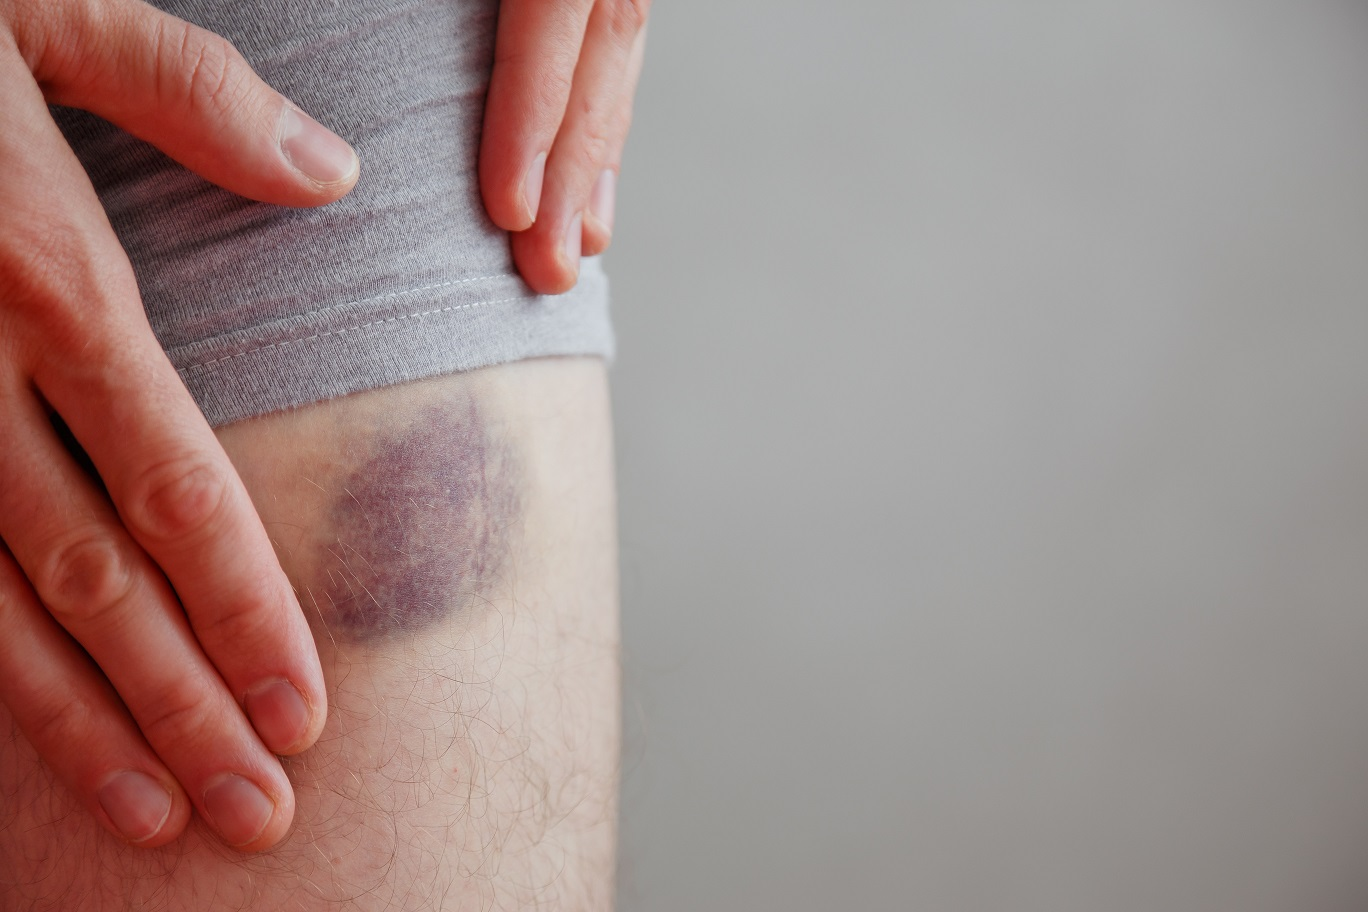


# Planejamento do Pipeline



Com base em tudo que vocês já aprenderam, quais seriam os principais passos? Preencha o esquema abaixo com o seu planejamento.

```
Exemplo:
Dados brutos de sequenciamento --> Etapa X --> Etapa Y --> Etapa Z... --> Resultado XYZ
...
```


# 0. Configuração de Ambiente **padrão**

In [1]:
%%bash
cd ..
./activateEnv.sh

In [2]:
%%bash
# Instalar os software que vamos usar nesta prática
mamba install -c bioconda -c conda-forge fastqc bwa gatk4 cutadapt samtools bedtools ensembl-vep=115 -y

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:

  - python=3.10



error    libmamba Could not create directory '/usr/pkgs': Permission denied



Transaction

  Prefix: /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env

  All requested packages already installed


Transaction starting

Transaction finished



In [3]:
%%bash
# Testa se um deles foi instalado corretamente (deve printar o manual de uso do programa)
vep --help

#----------------------------------#
# ENSEMBL VARIANT EFFECT PREDICTOR #
#----------------------------------#

Versions:
  ensembl              : 115.266b84d
  ensembl-compara      : 115.ae48a7a
  ensembl-funcgen      : 115.57f7061
  ensembl-io           : 115.25061d3
  ensembl-variation    : 115.b7c2637
  ensembl-vep          : 115.2

Help: dev@ensembl.org , helpdesk@ensembl.org
Twitter: @ensembl

http://www.ensembl.org/info/docs/tools/vep/script/index.html

Usage:
./vep [--cache|--offline|--database] [arguments]

Basic options

--help                 Display this message and quit

-i | --input_file      Input file
-o | --output_file     Output file
--force_overwrite      Force overwriting of output file
--species [species]    Species to use [default: "human"]

--everything           Shortcut switch to turn on commonly used options. See web
                       documentation for details [default: off]
--fork [num_forks]     Use forking to improve script runtime

For full option doc

In [4]:
%%bash
# Criar as pastas para organizar os arquivos que serão gerados
mkdir -p raw fastqc cutadapt bwa gatk mutect vep reference

In [5]:
%%bash
# Mover arquivos para as suas respectivas pastas e descompactar fasta.gz
mv *.fastq.gz raw/
gunzip -c chr2-reference.fasta.gz > reference/chr2-reference.fasta
rm -rf chr2-reference.fasta.gz sample_data/

**Checkpoint 1:**  
Antes de seguir, verifique se as pastas foram criadas. Os arquivos fastqs do paciente deve estar dentro da pasta raw/ (2 arquivos) e o arquivo fasta da referência deve estar dentro da pasta reference/.

# 1. Controle de Qualidade

A partir de agora, serão realizados todos os comandos para o ```patient1```. Ao terminar, você precisará fazer o mesmo para o ```patient2```.

In [6]:
%%bash
# Gerar o relatório da qualidade dos reads de sequenciamento
fastqc -o fastqc/ raw/patient-lma_R1.fastq.gz raw/patient-lma_R2.fastq.gz

application/gzip
application/gzip


Started analysis of patient-lma_R1.fastq.gz
Approx 5% complete for patient-lma_R1.fastq.gz
Approx 10% complete for patient-lma_R1.fastq.gz
Approx 15% complete for patient-lma_R1.fastq.gz
Approx 20% complete for patient-lma_R1.fastq.gz
Approx 25% complete for patient-lma_R1.fastq.gz
Approx 30% complete for patient-lma_R1.fastq.gz
Approx 35% complete for patient-lma_R1.fastq.gz
Approx 40% complete for patient-lma_R1.fastq.gz
Approx 45% complete for patient-lma_R1.fastq.gz
Approx 50% complete for patient-lma_R1.fastq.gz
Approx 55% complete for patient-lma_R1.fastq.gz
Approx 60% complete for patient-lma_R1.fastq.gz
Approx 65% complete for patient-lma_R1.fastq.gz
Approx 70% complete for patient-lma_R1.fastq.gz
Approx 75% complete for patient-lma_R1.fastq.gz
Approx 80% complete for patient-lma_R1.fastq.gz
Approx 85% complete for patient-lma_R1.fastq.gz
Approx 90% complete for patient-lma_R1.fastq.gz
Approx 95% complete for patient-lma_R1.fastq.gz
Approx 100% complete for patient-lma_R1.fastq

Analysis complete for patient-lma_R1.fastq.gz


Started analysis of patient-lma_R2.fastq.gz
Approx 5% complete for patient-lma_R2.fastq.gz
Approx 10% complete for patient-lma_R2.fastq.gz
Approx 15% complete for patient-lma_R2.fastq.gz
Approx 20% complete for patient-lma_R2.fastq.gz
Approx 25% complete for patient-lma_R2.fastq.gz
Approx 30% complete for patient-lma_R2.fastq.gz
Approx 35% complete for patient-lma_R2.fastq.gz
Approx 40% complete for patient-lma_R2.fastq.gz
Approx 45% complete for patient-lma_R2.fastq.gz
Approx 50% complete for patient-lma_R2.fastq.gz
Approx 55% complete for patient-lma_R2.fastq.gz
Approx 60% complete for patient-lma_R2.fastq.gz
Approx 65% complete for patient-lma_R2.fastq.gz
Approx 70% complete for patient-lma_R2.fastq.gz
Approx 75% complete for patient-lma_R2.fastq.gz
Approx 80% complete for patient-lma_R2.fastq.gz
Approx 85% complete for patient-lma_R2.fastq.gz
Approx 90% complete for patient-lma_R2.fastq.gz
Approx 95% complete for patient-lma_R2.fastq.gz
Approx 100% complete for patient-lma_R2.fastq

Analysis complete for patient-lma_R2.fastq.gz


In [7]:
%%bash
# Filtrar sequências muito pequenas e cortar as pontas
cutadapt \
  -u 5 -U 5 \
  -u -5 -U -5 \
  -m 90 \
  -o cutadapt/patient-lma-trimmed_R1.fastq.gz \
  -p cutadapt/patient-lma-trimmed_R2.fastq.gz \
  raw/patient-lma_R1.fastq.gz \
  raw/patient-lma_R2.fastq.gz

This is cutadapt 5.1 with Python 3.10.14
Command line parameters: -u 5 -U 5 -u -5 -U -5 -m 90 -o cutadapt/patient-lma-trimmed_R1.fastq.gz -p cutadapt/patient-lma-trimmed_R2.fastq.gz raw/patient-lma_R1.fastq.gz raw/patient-lma_R2.fastq.gz
Processing paired-end reads on 1 core ...

=== Summary ===

Total read pairs processed:            400,000

== Read fate breakdown ==
Pairs that were too short:                  20 (0.0%)
Pairs written (passing filters):       399,980 (100.0%)

Total basepairs processed:   112,008,326 bp
  Read 1:    56,003,007 bp
  Read 2:    56,005,319 bp
Total written (filtered):    104,004,000 bp (92.9%)
  Read 1:    52,000,881 bp
  Read 2:    52,003,119 bp


# 2. Mapeamento com a referência do genoma humano

In [8]:
%%bash
# Indexar o genoma humano de referência para realizar o mapeamento e posterior remoção de contaminante (cerca de 5 min)
samtools faidx reference/chr2-reference.fasta
bwa index reference/chr2-reference.fasta

[bwa_index] Pack FASTA... 0.45 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=484387058, availableWord=46083044
[BWTIncConstructFromPacked] 10 iterations done. 74963250 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 139500786 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 196857890 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 247833010 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 293135810 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 333397042 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 369177298 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 400974850 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 429232578 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 454344066 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 476

In [9]:
%%bash
# Proceder com o alinhamento contra o genoma humano (cerca de 3 min)
bwa mem reference/chr2-reference.fasta \
  -R '@RG\tID:sample1\tSM:sample1\tPL:ILLUMINA\tLB:lib1\tPU:unit1' \
  cutadapt/patient-lma-trimmed_R1.fastq.gz \
  cutadapt/patient-lma-trimmed_R2.fastq.gz \
  | samtools sort -o bwa/patient-lma-mapped.bam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 76874 sequences (10000169 bp)...
[M::process] read 76930 sequences (10000104 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 37700, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (319, 339, 359)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (239, 439)
[M::mem_pestat] mean and std.dev: (339.26, 29.50)
[M::mem_pestat] low and high boundaries for proper pairs: (199, 479)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 76874 reads in 6.138 CPU sec, 6.073 real sec
[M::process] read 76912 sequences (10000060 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 37687, 0, 0)
[M::mem_pestat] skip orientation 

In [10]:
%%bash
# Indexar o bam para gerar o bai e visualizar no IGV
samtools index bwa/patient-lma-mapped.bam

**Checkpoint 2:**  
Baixe os arquivos .BAM e .BAI e carregar no IGV. Encontre o gene DNMT3A no cromossomo 2 e verifique se há a presença de mutações nas regiões de interesse.


```
Resp:
```



# 3. Chamada de Variantes

Pergunta: Da onde eu tirei estes comandos e parâmetros utilizados para chamada de variantes com Mutect2?  
```
Resp:
```

In [11]:
%%bash
# Indexar a referência e BAM para chamada de variantes com GATK
samtools dict reference/chr2-reference.fasta > reference/chr2-reference.dict
samtools index bwa/patient-lma-mapped.bam

In [12]:
%%bash
# Chamada de variantes com mutect2 (cerca de 3 min)
 gatk Mutect2 -R reference/chr2-reference.fasta \
    -I bwa/patient-lma-mapped.bam \
    -O mutect/patient-lma-unfiltered.vcf

Using GATK jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar Mutect2 -R reference/chr2-reference.fasta -I bwa/patient-lma-mapped.bam -O mutect/patient-lma-unfiltered.vcf
14:52:56.381 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:52:56.487 INFO  Mutect2 - ------------------------------------------------------------
14:52:56.488 INFO  Mutect2 - The Genome Analysis Toolkit (GATK) v4.6.2.0
14:52:56.488 INFO  Mutect2 - For support and documentat

Tool returned:
SUCCESS


In [13]:
%%bash
# Filtragem de variantes
gatk FilterMutectCalls \
    -R reference/chr2-reference.fasta \
    -V mutect/patient-lma-unfiltered.vcf \
    -O mutect/patient-lma-filtered.vcf

Using GATK jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar FilterMutectCalls -R reference/chr2-reference.fasta -V mutect/patient-lma-unfiltered.vcf -O mutect/patient-lma-filtered.vcf
14:53:29.689 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:53:29.741 INFO  FilterMutectCalls - ------------------------------------------------------------
14:53:29.742 INFO  FilterMutectCalls - The Genome Analysis Toolkit (GATK) v4.6.2.0
14:53:29.742 INFO  F

Exercício 1: Encontre a frequência alélica das variantes. Ou seja, em que frequência as variante estão presentes no paciente?  

```
Resp:
```


Exercício 2: Faça para o mesmo BAM, a chamada de variantes com o GATK haplotype caller (variantes germinativas). Compare os VCFs.  
Qual as diferenças que você observa?
```
Resp:
```


In [14]:
%%bash
gatk HaplotypeCaller -R reference/chr2-reference.fasta \
    -I bwa/patient-lma-mapped.bam \
    -O gatk/patient-lma-unfiltered.vcf

Using GATK jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar HaplotypeCaller -R reference/chr2-reference.fasta -I bwa/patient-lma-mapped.bam -O gatk/patient-lma-unfiltered.vcf
14:58:06.731 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/home/figa/Documents/Programming/VSCode/Metagenomics-Course/env/share/gatk4-4.6.2.0-1/gatk-package-4.6.2.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
14:58:06.794 INFO  HaplotypeCaller - ------------------------------------------------------------
14:58:06.796 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.6.2.0
14:58:06.796 INFO  HaplotypeCalle

Exercício 3: Faça a anotação de ambos os VCFs com VEP nas etapas abaixo, e volte para esta questão novamente.

# 4. Anotação de Variantes

In [ ]:
%%bash
# Como este script demora 1h, não precisa executar em aula. Chegando aqui, peça o tsv anotado para o professor.
# Script oficial baixa cache do genoma humano (grande volume de dados, demora cerca de 60 min)
vep_install -a cf -s homo_sapiens -y GRCh38 --NO_UPDATE

In [15]:
%%bash
# Index VCF files para anotação
bgzip mutect/patient-lma-filtered.vcf
tabix -f -p vcf mutect/patient-lma-filtered.vcf.gz


In [16]:
%%bash
# Anotação de variantes a nível de proteína
vep -i mutect/patient-lma-filtered.vcf.gz \
    --output_file vep/patient-lma-filtered.vep.tsv \
    --tab --force_overwrite \
    --offline --cache --dir_cache ~/.vep \
    --assembly GRCh38 \
    --symbol --hgvs --canonical --af_1kg --max_af \
    --everything --pick\
    --stats_file vep/patient-lma-filtered.vep.html


# 5. Acionabilidade para tratamento
Em alguns casos, o tumor causado por uma determinada variantes pode ser tratado com uma drogra específica para esta mutação. Existem alguns bancos que fazem o link entre a variante e drogas aprovadas:  
- [OncoKB](https://www.oncokb.org/)
- [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/)
- [COSMIC](https://cancer.sanger.ac.uk/cosmic)

Os níveis (levels) são uma classificação da força e tipo de evidência que suporta a ação terapêutica associada a uma variante somática, usada especialmente em bancos como OncoKB para guiar decisões clínicas na medicina de precisão.

Explicação dos níveis (levels) terapêuticos OncoKB:
**Level 1**: Variante com biomarcador aprovado pela FDA para indicação terapêutica específica no tipo tumoral considerado. Exemplo: mutação BRAF V600E em melanoma para o uso de vemurafenib.

**Level 2**: Variante com biomarcador reconhecido por diretrizes profissionais ou com aprovação regulatória para outra indicação, mas com evidências fortes indicando benefício potencial naquele tumor. Exemplo: mutações em determinados genes com recomendação NCCN, porém não aprovadas diretamente para aquele tumor.

**Level 3**: Variantes preditivas de resposta a drogas em estudos clínicos bem controlados, mas ainda não em diretrizes ou aprovação formal (subdividido em 3A e 3B conforme força da evidência).

**Level 4**: Baseado em evidências biológicas convincentes, porém sem suporte clínico robusto. Ações terapêuticas são ainda experimentais.

Os níveis ajudam a priorizar quais variantes devem orientar tratamentos clínicos e quais necessitam investigação adicional, garantindo uso seguro e eficaz da terapia-alvo.



Exercício 4: Procure a variante somática primária do paciente no OncoKB, e descubra se existem condutas clínicas e tratamentos que podem ser seguidos.
```
Resp:
```